In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:
counties = pd.read_csv('Population Estimates by County.csv', error_bad_lines=False)
counties['County'] = counties.County.str.replace('County ?' , '')
counties['Population'] = counties.Population.str.replace(',?' , '')
counties['Population'] = counties['Population'].astype('int64')
counties['County'] = counties['County'].str.strip(' ')

In [3]:
url = "https://data.ca.gov/dataset/529ac907-6ba1-4cb7-9aae-8966fc96aeef/resource/42d33765-20fd-44b8-a978-b083b7542225/download/hospitals_by_county.csv"
df = pd.read_csv(url)
pd.set_option("display.max_rows", None, "display.max_column", None, 'display.width', 1000)
date = datetime.today().strftime('%Y-%m-%d')

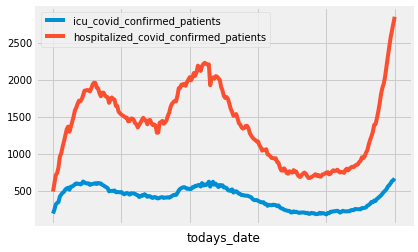

In [4]:
LA_data = df.where(df['county'] == 'Los Angeles').dropna(thresh = 2)
LA_data
LA_data.plot.line(x = 'todays_date', y = ["icu_covid_confirmed_patients", "hospitalized_covid_confirmed_patients"])

In [5]:
today = df[df.todays_date == (datetime.now() - timedelta(1)).strftime('%Y-%m-%d')]
today = today[['county', 'icu_covid_confirmed_patients', 'icu_suspected_covid_patients', 'icu_available_beds']]
today.sort_values(by = ['county'], inplace = True, ascending = True)
today.reset_index(inplace=True, drop=True)
today

,county,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Alameda,61.0,3.0,91.0
1,Amador,3.0,0.0,1.0
2,Butte,8.0,0.0,15.0
3,Calaveras,2.0,0.0,5.0
4,Colusa,0.0,0.0,0.0
5,Contra Costa,35.0,3.0,39.0
6,Del Norte,0.0,0.0,4.0
7,El Dorado,5.0,0.0,6.0
8,Fresno,58.0,0.0,5.0
9,Glenn,0.0,0.0,0.0


In [6]:
yesterday = df[df.todays_date == (datetime.now() - timedelta(2)).strftime('%Y-%m-%d')]
yesterday = yesterday[['county', 'icu_covid_confirmed_patients', 'icu_suspected_covid_patients', 'icu_available_beds']]
yesterday.sort_values(by = ['county'], inplace = True, ascending = True)
yesterday.reset_index(inplace=True, drop=True)
yesterday

,county,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Alameda,58.0,3.0,91.0
1,Amador,3.0,0.0,2.0
2,Butte,7.0,1.0,21.0
3,Calaveras,2.0,0.0,5.0
4,Colusa,0.0,0.0,0.0
5,Contra Costa,36.0,3.0,35.0
6,Del Norte,0.0,0.0,2.0
7,El Dorado,4.0,0.0,7.0
8,Fresno,66.0,4.0,11.0
9,Glenn,0.0,0.0,0.0


In [7]:
covid_pop_today = today.set_index('county').join(counties.set_index('County'))
covid_pop_yesterday = yesterday.set_index('county').join(counties.set_index('County'))

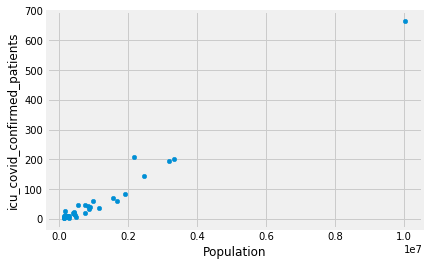

In [8]:
pop_above_100000_today = covid_pop_today.where(covid_pop_today['Population'] > 100000).dropna(thresh = 2)
pop_above_100000_yesterday = covid_pop_yesterday.where(covid_pop_yesterday['Population'] > 100000).dropna(thresh = 2)

pop_above_100000_today.plot.scatter(x = 'Population', y = 'icu_covid_confirmed_patients')
# sns.regplot(pop_above_100000_today['Population'], pop_above_100000_today['icu_covid_confirmed_patients'])
# sns.regplot(pop_above_100000_yesterday['Population'], pop_above_100000_yesterday['icu_covid_confirmed_patients'])

In [9]:
pop_above_100000_today

,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,Population
county,,,,
Alameda,61.0,3.0,91.0,1671329.0
Butte,8.0,0.0,15.0,219186.0
Contra Costa,35.0,3.0,39.0,1153526.0
El Dorado,5.0,0.0,6.0,192843.0
Fresno,58.0,0.0,5.0,999101.0
Humboldt,1.0,2.0,5.0,135558.0
Imperial,27.0,0.0,1.0,181215.0
Kern,39.0,1.0,33.0,900202.0
Kings,10.0,0.0,0.0,152940.0
